In [1]:
import pandas as pd
import numpy as np
import h5py
import math
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [3]:
# https://dataplatform.knmi.nl/dataset/rad-nl25-rac-mfbs-01h-2-0
# Timestamp 2019-11-11T07:54:45+00:00

path = 'datasets/KNMI/2008/01'
knmi = os.listdir(path)

In [4]:
# Go through januray and change rewrite all h5 files into a more compact and readable csv file for later use

ds = []
current_day = '01'
for file in knmi:
    hdf = h5py.File('{}/{}'.format(path, file), 'r')
    starting_points = hdf['geographic'].attrs['geo_product_corners']
    lot_start = starting_points[3]
    lat_start = starting_points[2]
    date = hdf['overview'].attrs['product_datetime_end'][0].decode('UTF-8')
    year = date[7:11]
    month = date[3:6]
    day = date[0:2]
    hour = date[12:14]
    
    if(day != current_day):
        df = pd.DataFrame(ds, columns=['Precipitation', 'Longtitude', 'Latitude', 'Year', 'Month', 'Day', 'Hour'])
        df = df.drop(df[df.Precipitation < 0].index)
        filepath = Path('datasets/KNMI_New/{}/{}/{}.csv'.format(year, month, current_day))  
        filepath.parent.mkdir(parents=True, exist_ok=True)
        df.to_csv(filepath)
        print(current_day)
        current_day = day
        ds = []
        
    data = np.array(hdf['image1/image_data'])
    for y in range(765):
        for x in range(700):
            value = data[y][x]
            ds.append([value, 
                       lot_start - y * 0.0086431372549019607843137254902, 
                       lat_start + x * 0.01550857142857142857142857142857,
                       year, month, day, hour])
    print(day, hour)
    
print('Done')

Done


In [6]:
df = pd.read_csv('datasets/KNMI_New/2008/JAN/01.csv')

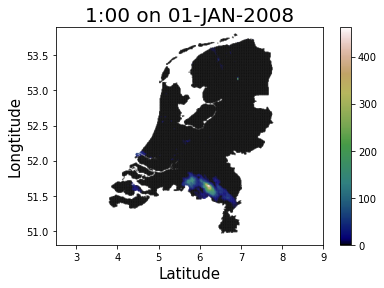

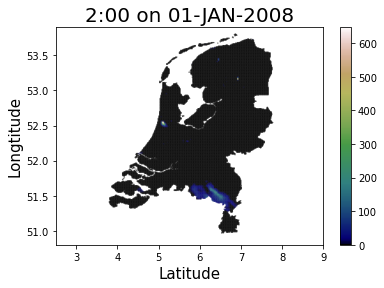

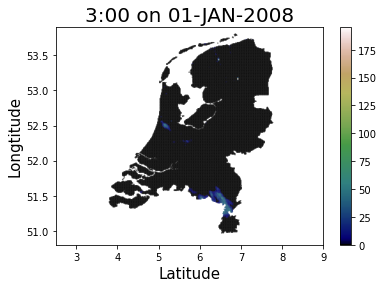

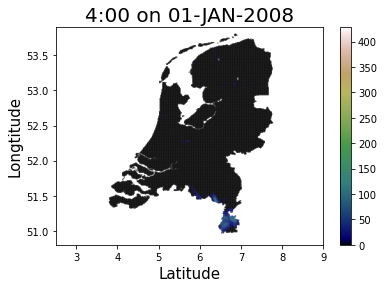

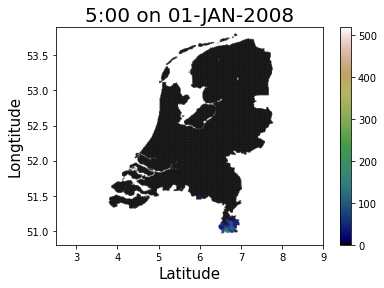

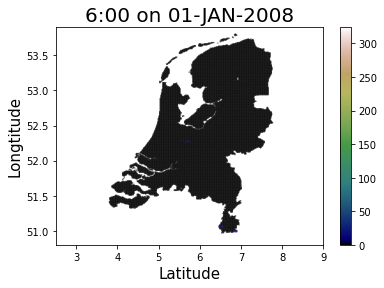

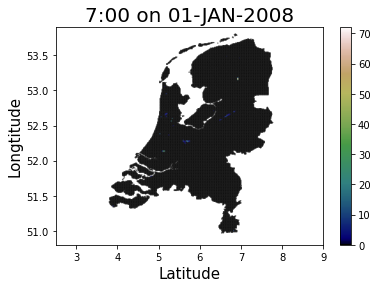

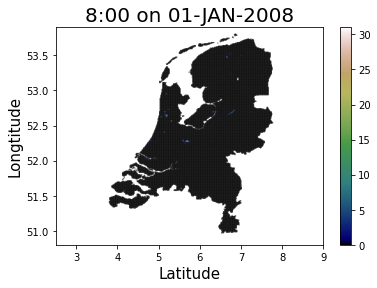

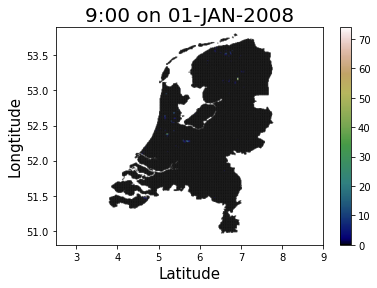

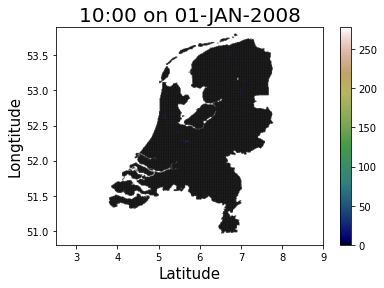

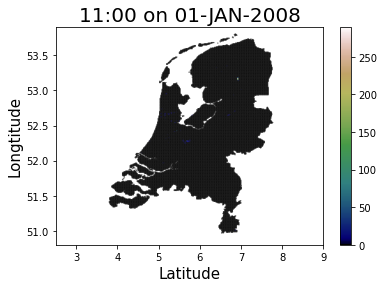

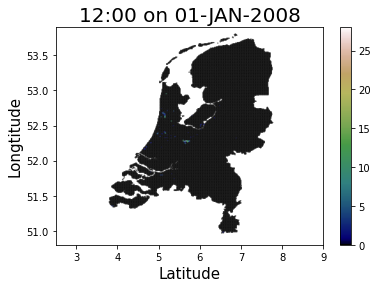

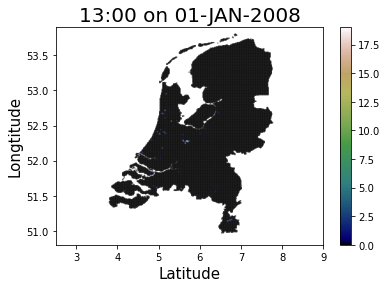

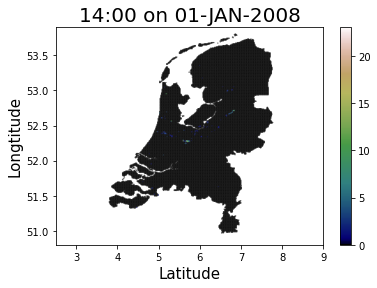

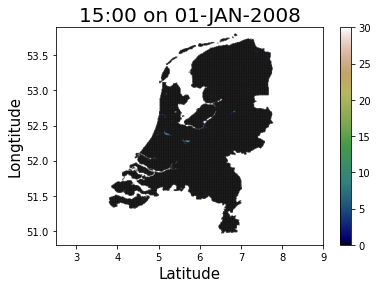

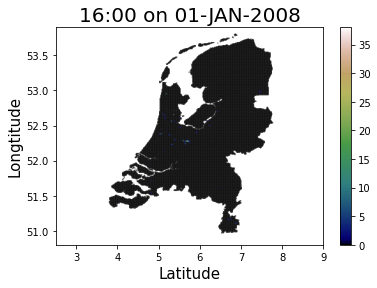

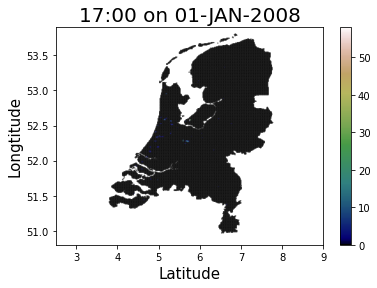

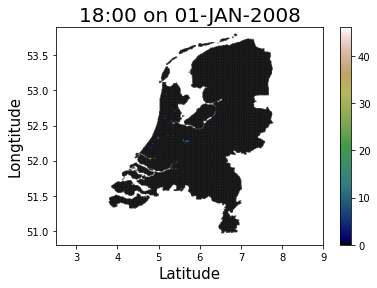

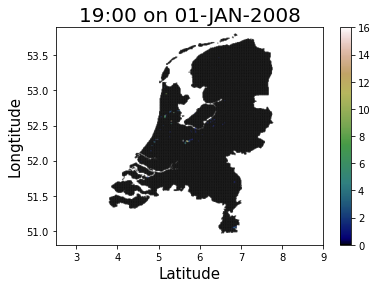

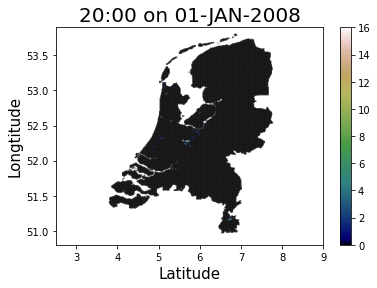

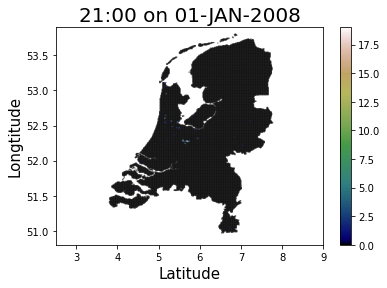

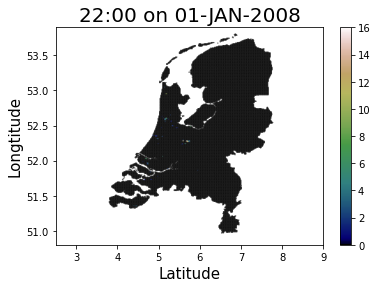

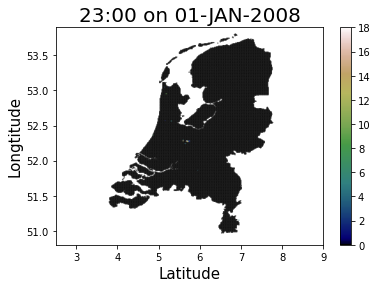

In [7]:
for hour in df['Hour'].unique():
    hour_df = df[df.Hour == hour]
    plt.scatter(x=hour_df['Latitude'], y=hour_df['Longtitude'], c=hour_df['Precipitation'], cmap='gist_earth', s=0.05)
    plt.colorbar()
    plt.title("{}:00 on {}-{}-{}".format(hour, '01', 'JAN', '2008'), fontdict={'size':20})
    plt.xlabel("Latitude", fontdict={'size':15})
    plt.ylabel("Longtitude", fontdict={'size':15})
    plt.xlim(2.5, 9)
    plt.ylim(50.8, 53.9)
    plt.show()

In [ ]:
hdf = h5py.File('C:/Users/ruben/OneDrive/Bureaublad/KNMI/2014/07/RAD_NL25_RAC_MFBS_01H_201407280100_NL.h5', 'r')
print(hdf.keys())

In [ ]:
starting_points = hdf['geographic'].attrs['geo_product_corners']
print(starting_points)

lot_start = starting_points[3]
lat_start = starting_points[2]

print(lot_start, lat_start)

In [ ]:
date = hdf['overview'].attrs['product_datetime_end'][0].decode('UTF-8')
print(date)

year = date[7:11]
month = date[3:6]
day = date[0:2]
hour = date[12:14]

print(year, month, day, hour)

In [ ]:
#TODO: Add more precise convertion from km to lot/lat
data = np.array(hdf['image1/image_data'])
ds = []

for y in range(251, 580):
    for x in range(245, 501):
        value = data[y][x]
        ds.append([value, 
                   lot_start - y * 0.0086431372549019607843137254902, 
                   lat_start + x * 0.01550857142857142857142857142857,
                   year, month, day, hour])

In [ ]:
df = pd.DataFrame(ds, columns=['Precipitation', 'Longtitude', 'Latitude', 'Year', 'Month', 'Day', 'Hour'])
df = df.drop(df[df.Precipitation < 0].index)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

In [ ]:
plt.scatter(x=df['Latitude'], y=df['Longtitude'], c=df['Precipitation'], cmap='gist_earth', s=0.05)
plt.colorbar()

plt.title("{}:00 on {}-{}-{}".format(hour, day, month, year), fontdict={'size':20})
plt.xlabel("Latitude", fontdict={'size':15})
plt.ylabel("Longtitude", fontdict={'size':15})

plt.xlim(2.5, 9)
plt.ylim(50.8, 53.9)

plt.show()

In [ ]:
filepath = Path('C:/Users/ruben/OneDrive/Bureaublad/FHICT/Semester 4/Group Project/Datasets/Precipitation.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)